# Validation

In [23]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

In [24]:
# Permute the dataset
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [25]:
def preprocess_features(california_housing_dataframe):
    selected_features = california_housing_dataframe[[
        "latitude",
        "longitude",
        "housing_median_age",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_income"
    ]]
    processed_features = selected_features.copy()
    
    # Create a synthetic feature.
    processed_features["rooms_per_person"] = \
        (california_housing_dataframe["total_rooms"] / california_housing_dataframe["population"])
    
    return processed_features

In [26]:
def preprocess_targets(california_housing_dataframe):
    output_targets = pd.DataFrame()
    # Scale the target to be in units of thousands of dollars.
    output_targets["median_house_value"] = (california_housing_dataframe["median_house_value"] / 1000.0)
    return output_targets

Prepare `training` and `validation` data set

In [27]:
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_examples.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2628.6,538.2,1429.6,500.8,3.9,2.0
std,2.1,2.0,12.6,2165.9,423.4,1160.6,386.4,1.9,1.1
min,32.5,-124.3,1.0,11.0,3.0,8.0,3.0,0.5,0.1
25%,33.9,-121.8,18.0,1453.0,296.0,791.0,281.0,2.6,1.5
50%,34.2,-118.5,29.0,2119.0,433.0,1168.0,408.0,3.5,1.9
75%,37.7,-118.0,37.0,3129.0,648.2,1720.0,604.0,4.7,2.3
max,42.0,-114.3,52.0,32627.0,6445.0,35682.0,6082.0,15.0,52.0


In [28]:
training_targets = preprocess_targets(california_housing_dataframe.head(12000))
training_targets.describe()

,median_house_value
count,12000.0
mean,206.8
std,116.0
min,15.0
25%,118.8
50%,179.9
75%,264.4
max,500.0


In [29]:
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_examples.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.5,28.4,2679.8,542.4,1429.6,502.3,3.9,2.0
std,2.1,2.0,12.6,2213.2,416.9,1116.8,380.0,1.9,1.4
min,32.5,-124.3,2.0,2.0,1.0,3.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1474.0,299.0,788.0,283.0,2.6,1.5
50%,34.2,-118.5,28.0,2149.0,435.0,1162.5,411.0,3.6,2.0
75%,37.7,-118.0,37.0,3204.0,648.2,1725.2,607.0,4.8,2.3
max,41.9,-114.5,52.0,37937.0,5471.0,16122.0,5189.0,15.0,55.2


In [30]:
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))
validation_targets.describe()

,median_house_value
count,5000.0
mean,208.5
std,115.8
min,15.0
25%,121.9
50%,181.4
75%,267.1
max,500.0


### Lat/Long vs. Median House Value

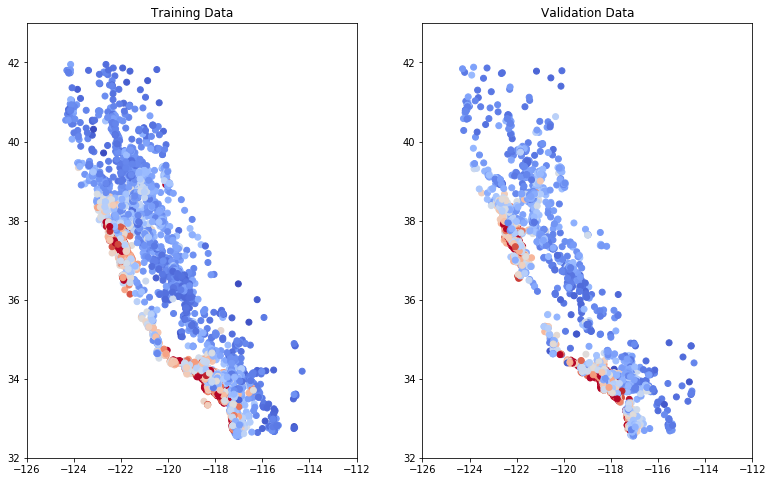

In [31]:
plt.figure(figsize=(13, 8))

ax = plt.subplot(1,2,1)
ax.set_title("Training Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(training_examples["longitude"],
            training_examples["latitude"],
            cmap="coolwarm",
            c=training_targets["median_house_value"] / training_targets["median_house_value"].max())

ax = plt.subplot(1,2,2)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(validation_examples["longitude"],
            validation_examples["latitude"],
            cmap="coolwarm",
            c=validation_targets["median_house_value"] / validation_targets["median_house_value"].max())

_ = plt.plot()